In [32]:
%load_ext autoreload
%autoreload 2
import os, sys
from collections import OrderedDict
import numpy as np
import pandas as pd

from sklearn import decomposition, metrics, random_projection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

import enrichr
import evaluations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

In [3]:
# Download enrichr libs 
lib_names = [
    'ChEA_2016', 'ENCODE_TF_ChIP-seq_2015', 'ENCODE_Histone_Modifications_2015',
    'TRANSFAC_and_JASPAR_PWMs', 'Genome_Browser_PWMs',
    'KEGG_2016', 'KEA_2015',
    'GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018',
    'MGI_Mammalian_Phenotype_2017', 'Human_Phenotype_Ontology',
    'dbGaP', 
    'Genes_Associated_with_NIH_Grants',
    'Chromosome_Location_hg19',
    'Pfam_InterPro_Domains',
    'HomoloGene'
            ]
for lib_name in lib_names:
    print(lib_name)
    enrichr.get_library_filepath(lib_name)

ChEA_2016
ENCODE_TF_ChIP-seq_2015
ENCODE_Histone_Modifications_2015
TRANSFAC_and_JASPAR_PWMs
Genome_Browser_PWMs
KEGG_2016
KEA_2015
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
MGI_Mammalian_Phenotype_2017
Human_Phenotype_Ontology
dbGaP
Genes_Associated_with_NIH_Grants
Chromosome_Location_hg19
Pfam_InterPro_Domains
HomoloGene


In [4]:
libs_x = [
    'ChEA_2016', 'ENCODE_TF_ChIP-seq_2015',
    'TRANSFAC_and_JASPAR_PWMs', 'Genome_Browser_PWMs',
    'KEA_2015',
    'GO_Biological_Process_2018', 'GO_Cellular_Component_2018',
    'MGI_Mammalian_Phenotype_2017', 'Human_Phenotype_Ontology',
    'dbGaP', 
    'Genes_Associated_with_NIH_Grants',
    'Chromosome_Location_hg19',
    'Pfam_InterPro_Domains',
    'HomoloGene'    
]


In [5]:
# Parse all gmts 
d_gmt = OrderedDict()
for lib_name in libs_x:
    fp = enrichr.get_library_filepath(lib_name)
    d_gmt_i = enrichr.parse_gmt(fp, namespace=lib_name)
    d_gmt.update(d_gmt_i)

print('Number of gene sets:', len(d_gmt))

Number of gene sets: 48969


In [6]:
list(d_gmt.keys())[:10]

['ChEA_2016$BP1_19119308_ChIP-ChIP_Hs578T_Human',
 'ChEA_2016$FOXP1_22492998_ChIP-Seq_STRATIUM_Mouse',
 'ChEA_2016$E4F1_26484288_ChIP-Seq_MOUSE_EMBRYONIC_FIBROBLAST_Mouse',
 'ChEA_2016$RBPJ_22232070_ChIP-Seq_NCS_Mouse',
 'ChEA_2016$TCF21_23034159_ChIP-ChIP_E13_GONADS_Rat',
 'ChEA_2016$GATA1_22025678_ChIP-Seq_K562_Human',
 'ChEA_2016$HOXA2_22223247_ChIP-Seq_E11.5_EMBRYO_Mouse',
 'ChEA_2016$STAT3_22323479_ChIP-Seq_MACROPHAGE_Mouse',
 'ChEA_2016$TP63_17297297_ChIP-ChIP_HaCaT_Human',
 'ChEA_2016$STAT6_21828071_ChIP-Seq_BEAS2B_Human']

In [7]:
genes = list(d_gmt.values())[0]
genes

['CBR1',
 'OR1A1',
 'HTR1B',
 'LAPTM5',
 'ADAM21',
 'HPSE2',
 'SELE',
 'CSF2RB',
 'VEGFA',
 'PTPRE',
 'LSM7',
 'IL2RA',
 'MMP27',
 'LGALS13',
 'ITGA9',
 'CCL4',
 'CASQ1',
 'TAC3']

In [8]:
# Write the genes to a plain text file
with open ('../GloVe/GMTs_14', 'w') as out:
    for genes in d_gmt.values():
        out.write(' '.join(genes))
        

In [20]:
!cd ../GloVe/ && ./run_glove.sh

mkdir -p build
gcc src/glove.c -o build/glove -lm -pthread -Ofast -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc src/shuffle.c -o build/shuffle -lm -pthread -Ofast -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc src/cooccur.c -o build/cooccur -lm -pthread -Ofast -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc src/vocab_count.c -o build/vocab_count -lm -pthread -Ofast -march=native -funroll-loops -Wall -Wextra -Wpedantic

$ build/vocab_count -min-count 5 -verbose 2 < GMTs_14 > vocab.txt
BUILDING VOCABULARY
Processed 0 tokens.100000 tokens.200000 tokens.300000 tokens.400000 tokens.500000 tokens.600000 tokens.700000 tokens.800000 tokens.900000 tokens.1000000 tokens.1100000 tokens.1200000 tokens.1300000 tokens.1400000 tokens.1500000 tokens.1600000 tokens.1700000 tokens.1800000 tokens.1900000 tokens.2000000 tokens.2100000 tokens.2200000 tokens.2300000 tokens.2400000 tokens.2500000 tokens.2600000 tokens.2700000 tokens.2800000 tokens.2900000 tokens.3000000 token

Merging cooccurrence files: processed 0 lines.100000 lines.200000 lines.300000 lines.400000 lines.500000 lines.600000 lines.700000 lines.800000 lines.900000 lines.1000000 lines.1100000 lines.1200000 lines.1300000 lines.1400000 lines.1500000 lines.1600000 lines.1700000 lines.1800000 lines.1900000 lines.2000000 lines.2100000 lines.2200000 lines.2300000 lines.2400000 lines.2500000 lines.2600000 lines.2700000 lines.2800000 lines.2900000 lines.3000000 lines.3100000 lines.3200000 lines.3300000 lines.3400000 lines.3500000 lines.3600000 lines.3700000 lines.3800000 lines.3900000 lines.4000000 lines.4100000 lines.4200000 lines.4300000 lines.4300000 lines.4400000 lines.4500000 lines.4600000 lines.4700000 lines.4700000 lines.4800000 lines.4900000 lines.5000000 lines.5100000 lines.5200000 lines.5300000 lines.5400000 lines.5400000 lines.5500000 lines.5600000 lines.5700000 lines.5700000 lines.5800000 lines.5900000 lines.6000000 lines.6100000 lines.6200000 lines.6300000 lines.6400000 lines.6500000 lin

02/12/19 - 04:37.52PM, iter: 007, cost: 0.021420
02/12/19 - 04:38.00PM, iter: 008, cost: 0.019918
02/12/19 - 04:38.08PM, iter: 009, cost: 0.018817
02/12/19 - 04:38.16PM, iter: 010, cost: 0.017972
02/12/19 - 04:38.24PM, iter: 011, cost: 0.017308
02/12/19 - 04:38.32PM, iter: 012, cost: 0.016774
02/12/19 - 04:38.40PM, iter: 013, cost: 0.016336
02/12/19 - 04:38.48PM, iter: 014, cost: 0.015970
02/12/19 - 04:38.56PM, iter: 015, cost: 0.015663


# Evaluate GloVe

In [9]:
# Parse all gmts 
d_gmt = {}
for lib_name in lib_names:
    fp = enrichr.get_library_filepath(lib_name)
    d_gmt_i = enrichr.parse_gmt(fp, namespace=lib_name)
    d_gmt.update(d_gmt_i)

print('Number of gene sets:', len(d_gmt))

Number of gene sets: 50825


In [10]:
# term-frequency matrix (gene sets x genes)
tf_mat, genes = enrichr.gmt2mat(d_gmt, sparse_output=True, min_frequency=0)
tf_mat.shape

(50825, 63178)

In [11]:
# TF-IDF normalization
tfidf = TfidfTransformer(norm='l2')
tfidf_mat = tfidf.fit_transform(tf_mat)
tfidf_mat.shape

(50825, 63178)

In [12]:
# TF-IDF normalization
tfidf = TfidfTransformer(norm='l2', sublinear_tf=True)
tfidf_mat2 = tfidf.fit_transform(tf_mat)
tfidf_mat2.shape

(50825, 63178)

In [13]:
cutoff = 10
mask = np.asarray(tf_mat.sum(axis=0)).reshape(-1) > cutoff
tf_mat = tf_mat[:, mask]
tfidf_mat = tfidf_mat[:, mask]
tfidf_mat2 = tfidf_mat2[:, mask]

genes = genes[mask]
print(tf_mat.shape, genes.shape)

(50825, 32309) (32309,)


In [14]:
# Create a df for terms in gmt
terms_df = pd.DataFrame({
    'library': [ s.split('$')[0] for s in d_gmt.keys()],
    'term': [ s.split('$')[1] for s in d_gmt.keys()],
    'n_genes': [len(val) for val in d_gmt.values()]
}, index=list(d_gmt.keys()))
print(terms_df.shape)

(50825, 3)


In [15]:
mask_lib_x = np.in1d(terms_df['library'], libs_x)
tf_mat_x = tf_mat[mask_lib_x]
tfidf_mat_x = tfidf_mat[mask_lib_x]
tfidf_mat2_x = tfidf_mat2[mask_lib_x]
print(tf_mat_x.shape, tfidf_mat_x.shape)

(48969, 32309) (48969, 32309)


In [16]:
# libs used for evaluation
libs_y = ['KEGG_2016', 
          'GO_Molecular_Function_2018',
          'ENCODE_Histone_Modifications_2015']

In [17]:
## Load GloVe vectors
X_topics = pd.read_csv('../GloVe/vectors.txt', 
                       names=['gene'] + list(range(100)), 
                       sep=' ').set_index('gene')
print(X_topics.shape)
X_topics.head()

(36093, 100)


0         1         2         3         4         5         6   \
gene                                                                           
TP53   -0.183286  0.383523  0.136950 -0.241676  0.291182  0.102265  0.290870   
AKT1   -0.189080  0.622893  0.004805 -0.147861  0.087378  0.068943  0.124860   
TNF     0.935895  0.236272 -0.741680 -0.669817 -0.117906 -0.235613 -0.347818   
CTNNB1 -0.508051 -0.092117  0.570268  0.239320  0.250221  0.400304 -0.148889   
EGFR   -0.201814 -0.239603 -0.148017 -0.653403  0.302484 -0.140952  0.293421   

              7         8         9     ...           90        91        92  \
gene                                    ...                                    
TP53   -0.628900 -0.346820  0.351083    ...    -0.600185 -0.203301  0.160639   
AKT1   -0.833834 -0.477370  0.338337    ...    -0.699405  0.041869 -0.353359   
TNF    -1.444420 -0.522720  0.383288    ...    -1.518994 -0.938860 -0.692193   
CTNNB1 -1.394859  0.029818 -0.745319    ...    -0.897733 -0.361124 -0.403187   
EGFR   -0.694443 -0.220807  0.003046    ...    -0.295322 -0.577879 -1.032899   

              93        94        95        96        97        98        99  
gene                                                                          
TP53   -0.447542 -0.716657 -0.633704 -0.002643 -1.664427  0.537853 -0.000476  
AKT1   -1.011141 -0.456597 -0.270760 -0.111306 -0.957113  0.231149  0.179394  
TNF     0.090665  0.021429  0.215314  0.515880 -0.734492  0.367689 -0.576105  
CTNNB1 -1.349479 -0.976214 -0.211121 -0.842068 -0.941939 -0.556063  0.127025  
EGFR   -0.202139 -0.573338  0.397710 -0.314437 -1.566914 -0.116296  0.092607  

[5 rows x 100 columns]

In [70]:
X_topics.values.min(), X_topics.values.max()

(-2.623637, 2.854906)

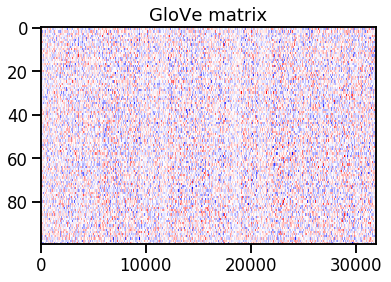

In [73]:
# Visualize GloVe
plt.imshow(X_topics.values.T, aspect='auto', cmap='bwr',
          vmin=-2, vmax=2);
plt.title('GloVe matrix');

In [18]:
# Find the overlapping genes
print(len(genes), len(X_topics.index))
shared_genes = list(set(genes) & set(X_topics.index))
print(len(shared_genes))

mask_shared_genes = np.in1d(genes, shared_genes)
tf_mat = tf_mat[:, mask_shared_genes]
shared_genes = genes[mask_shared_genes]

print(len(shared_genes))

32309 36093
31859
31859


In [19]:
X_topics = X_topics.loc[shared_genes]
X_topics.shape

(31859, 100)

In [20]:
import evaluations

In [21]:
knn_scores = evaluations.NN_generalization_accuracy_wrapper(X_topics.values, libs_y, tf_mat.T, 
                                                terms_df['library'],
                                               dummy=True, 
                                               model_name='baseline')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [22]:
knn_scores_glove = evaluations.NN_generalization_accuracy_wrapper(X_topics.values, libs_y, tf_mat.T, 
                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='GloVe')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [24]:
# Fit an SVD model
svd = decomposition.TruncatedSVD(n_components=100,
                                random_state=2018)
svd.fit(tfidf_mat_x[:, mask_shared_genes])

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=2018, tol=0.0)

In [25]:
X_topics_svd = svd.components_.T # genes by topics matrix
print(X_topics_svd.shape)

(31859, 100)


In [26]:
knn_scores_svd = evaluations.NN_generalization_accuracy_wrapper(X_topics_svd, libs_y, tf_mat.T, 
                                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='SVD')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [28]:
# Fit an SVD model on sublinear df
svd2 = decomposition.TruncatedSVD(n_components=100,
                                random_state=2018)
svd2.fit(tfidf_mat2_x[:, mask_shared_genes])
X_topics_svd2 = svd2.components_.T # genes by topics matrix
print(X_topics_svd2.shape)

(31859, 100)


In [29]:
knn_scores_svd2 = evaluations.NN_generalization_accuracy_wrapper(X_topics_svd2, libs_y, tf_mat.T, 
                                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='SVD-sublinear')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [33]:
# Random projection
rp = random_projection.GaussianRandomProjection(n_components=100, 
                                                random_state=2018)
rp.fit(tfidf_mat_x[:, mask_shared_genes])
X_topics_rp = rp.components_.T # genes by topics matrix
print(X_topics_rp.shape)

(31859, 100)


In [34]:
knn_scores_grp = evaluations.NN_generalization_accuracy_wrapper(X_topics_rp, libs_y, tf_mat.T, 
                                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='GRP')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [37]:
# Random projection
srp = random_projection.SparseRandomProjection(n_components=100, 
                                                random_state=2018)
srp.fit(tfidf_mat_x[:, mask_shared_genes])
X_topics_srp = srp.components_.T # genes by topics matrix
print(X_topics_srp.shape)

(31859, 100)


In [38]:
knn_scores_srp = evaluations.NN_generalization_accuracy_wrapper(X_topics_srp, libs_y, tf_mat.T, 
                                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='SRP')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [41]:
tfidf_mat_x[:, mask_shared_genes].shape

(48969, 31859)

In [42]:
# The original TF-IDF matrix without any topic modeling
knn_scores_tfidf = evaluations.NN_generalization_accuracy_wrapper(tfidf_mat_x[:, mask_shared_genes].T, libs_y, tf_mat.T, 
                                                                terms_df['library'],
                                               dummy=False, 
                                               model_name='TF-IDF')

KEGG_2016 (31859, 293)
GO_Molecular_Function_2018 (31859, 1151)
ENCODE_Histone_Modifications_2015 (31859, 412)


In [43]:
knn_scores_all = pd.concat([knn_scores, knn_scores_glove, 
                            knn_scores_svd, knn_scores_svd2,
                            knn_scores_grp, knn_scores_srp,
                            knn_scores_tfidf
                           ])
knn_scores_all.shape

(105, 3)

/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


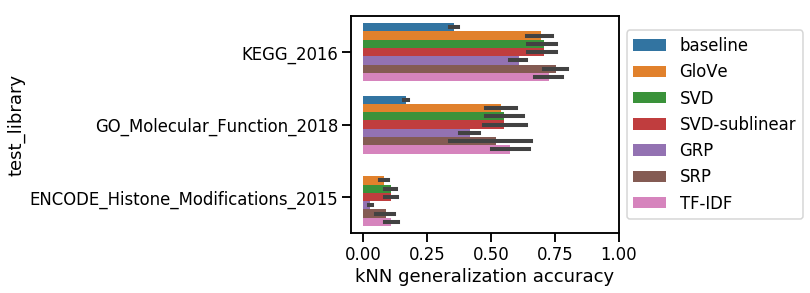

In [44]:
ax = sns.barplot(y='test_library', x='accuracy', data=knn_scores_all, hue='model')
# ax = sns.swarmplot(y='test_library', x='accuracy', data=knn_scores_all, hue='model')
ax.set_xlabel('kNN generalization accuracy')
ax.set_xlim([-0.05, 1]);
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Experiments with other evaluation methods

In [47]:
import scipy.sparse as sp
mask_lib_y = np.in1d(terms_df['library'], ['KEGG_2016'])
Y = tf_mat.T[:, mask_lib_y] # genes by functions binary matrix
if sp.issparse(Y):
    Y = Y.toarray() 


In [56]:
X_topics_srp.shape, Y.shape

((31859, 100), (31859, 293))

In [57]:

clf = KNeighborsClassifier(n_neighbors=10, metric='cosine', n_jobs=1)
clf.fit(X_topics_srp, Y[:, 0])
# metrics.roc_auc_score(clf.predict_proba(X_topics_srp), Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [59]:
%%timeit
Y_preds = clf.predict_proba(X_topics_srp)

14.6 s ± 45.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
%%timeit
clf = KNeighborsClassifier(n_neighbors=1, metric='cosine', n_jobs=1)
clf.fit(X_topics_srp, Y[:, 0])
Y_preds = clf.predict_proba(X_topics_srp)

12.4 s ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%%timeit
A_y = metrics.pairwise_distances(Y, metric='jaccard', n_jobs=8)

/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConvers

1min 55s ± 3.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
A_y = metrics.pairwise_distances(Y, metric='cosine', n_jobs=8)

1min 2s ± 3.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%%timeit
A_y = metrics.pairwise_distances(Y, metric='jaccard', n_jobs=1)

/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConvers

3min ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
from scipy import stats

In [68]:
# Collect a_y vectors
a_ys = []
for lib in libs_y:
    mask_lib_y = np.in1d(terms_df['library'], [lib])
    Y = tf_mat.T[:, mask_lib_y] # genes by functions binary matrix
    if sp.issparse(Y):
        Y = Y.toarray() 
    print(lib, Y.shape)
    A_y = metrics.pairwise_distances(Y, metric='jaccard', n_jobs=8)
    triu_idx = np.tril_indices(A_y.shape[0])
    a_ys.append(A_y[triu_idx])

KEGG_2016 (31859, 293)


/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


GO_Molecular_Function_2018 (31859, 1151)


/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


ENCODE_Histone_Modifications_2015 (31859, 412)


/Users/maayanlab/Documents/Zichen_Projects/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


In [69]:
# for each X_topics, compute the corr
Xs = [X_topics.values, X_topics_srp, tfidf_mat_x[:, mask_shared_genes].T]
names = ['GloVe', 'SRP', 'TF-IDF']
for i, X in enumerate(Xs):
    A_x = metrics.pairwise_distances(X, metric='cosine', n_jobs=8)
    for j, a_y in enumerate(a_ys):
        rho, p = stats.spearmanr(A_x[triu_idx], a_y)
        print('%s, %s, %.5f' % (names[i], libs_y[j], rho))


KeyboardInterrupt: 